In [ ]:
# Set up colab instance
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip3 install pydicom
!git clone https://github.com/thomasp05/gif-705-projet

In [3]:
import os
os.chdir('gif-705-projet')

In [ ]:
import time

import torch

from dataset import *
from models import *
from metrics import *
from grad_analysis import *

torch.manual_seed(111)

In [5]:
dataset = dcm_dataset('../drive/MyDrive/GIF-7005-Projet/gif-7005-projet/data')

train_set, test_set = train_test_split(dataset)
test_set.transforms = Downsample()

In [6]:
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=4, num_workers=2)

test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=1, num_workers=2)

In [ ]:
model = Inception_v3(False).to("cuda:0")

optim = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-3)
loss_fn = torch.nn.BCEWithLogitsLoss()

# If model exists, load it
if os.path.exists("../drive/MyDrive/GIF-7005-Projet/gif-7005-projet/inception_v3.pt"):
  model.load_state_dict(torch.load("../drive/MyDrive/GIF-7005-Projet/gif-7005-projet/inception_v3.pt"))
  optim.load_state_dict(torch.load("../drive/MyDrive/GIF-7005-Projet/gif-7005-projet/inception_v3_optim.pt"))

In [ ]:
model.eval()
model.return_grad() # False for class prediction, True to output grad-cam

run_test(model, test_loader, [Region_of_interest()], "cuda:0")

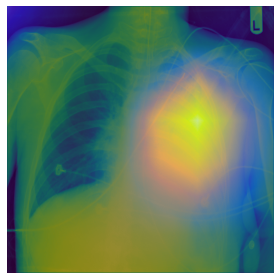

In [26]:
import matplotlib.pyplot as plt
# Display grad
img = test_set[torch.randint(0, len(test_set), (1, 1))][0].to("cuda:0").unsqueeze(0)
grad = model(img)

plt.imshow(img.squeeze().detach().cpu())
plt.imshow(grad.squeeze().detach().cpu(), cmap="gnuplot2", alpha=0.4)
plt.axis('off')
plt.tight_layout()
plt.show()